# LIBRARY

In [24]:
import pandas as pd
import numpy as np
import re, joblib
import collections
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split, cross_validate 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# DATASET

In [25]:
df = pd.read_csv('dataset.csv')
df.head()

,label,tweet
0,anger,soal jalan jatibaru polisi tidak bisa gertak g...
1,anger,sesama cewek lho kayaknya harusnya bisa leb...
2,happy,kepingin gudeg mbarek bu hj amad foto dari go...
3,anger,jln jatibaru bagian dari wilayah tanah abang p...
4,happy,sharing pengalaman saja kemarin jam batalin...


# TWEET DAN LABEL DATASET

In [37]:
text = df['tweet']
Y = df['label']

# VEKTORISASI

## 1. TF-IDF

In [38]:
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(text)

## 2. BIGRAM

In [39]:
bigram = CountVectorizer(ngram_range=(2,2))
X_bigram = bigram.fit_transform(text)

# PEMBAGIAN DATASET

## 1. TRAINING DAN TESTING (TF-IDF)

In [40]:
X_train_tfidf, X_test_tfidf, Y_train_tfidf, Y_test_tfidf = train_test_split(X_tfidf, Y, test_size=0.1, random_state=0, stratify = Y)
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)
print(Y_train_tfidf.shape)
print(Y_test_tfidf.shape)

(3960, 18037)
(441, 18037)
(3960,)
(441,)


## 2. TRAINING DAN TESTING (BIGRAM)

In [41]:
X_train_bigram, X_test_bigram, Y_train_bigram, Y_test_bigram = train_test_split(X_bigram, Y, test_size=0.1, random_state=0, stratify = Y)
print(X_train_bigram.shape)
print(X_test_bigram.shape)
print(Y_train_bigram.shape)
print(Y_test_bigram.shape)

(3960, 86121)
(441, 86121)
(3960,)
(441,)


# PEMODELAN TIAP SKENARIO
### Algoritma : KNN dan SVM Kernel RBF

## 1. KNN (TF-IDF)

In [42]:
model1 = KNeighborsClassifier()

In [43]:
# Evaluasi training tiap skenario dengan 10-Fold CV
scoring = ['accuracy','precision_macro','recall_macro','f1_macro']
score1 = cross_validate(model1, X_train_tfidf, Y_train_tfidf, cv=10, scoring=scoring)
print("Accuracy training adalah %0.4f"% score1['test_accuracy'].mean())
print("Precision training adalah %0.4f"% score1['test_precision_macro'].mean())
print("Recall training adalah %0.4f"% score1['test_recall_macro'].mean())
print("F1-score training adalah %0.4f"% score1['test_f1_macro'].mean())

Accuracy training adalah 0.4992
Precision training adalah 0.4951
Recall training adalah 0.5132
F1-score training adalah 0.4939


In [44]:
# Evaluasi testing tiap skenario dengan representasi confusion matrix
clf1 = model1.fit(X_train_tfidf, Y_train_tfidf)
predicted1 = clf1.predict(X_test_tfidf) # prediksi oleh model
print("Accuracy testing adalah %0.4f" % accuracy_score(Y_test_tfidf, predicted1))
print("Precision testing adalah %0.4f" % precision_score(Y_test_tfidf, predicted1, average='macro'))
print("Recall testing adalah %0.4f" % recall_score(Y_test_tfidf, predicted1, average='macro'))
print("F1-score testing adalah %0.4f" % f1_score(Y_test_tfidf, predicted1, average='macro'))
print(confusion_matrix(Y_test_tfidf, predicted1))

Accuracy testing adalah 0.5057
Precision testing adalah 0.5001
Recall testing adalah 0.5140
F1-score testing adalah 0.4981
[[72 10 10  7 11]
 [18 31  4  4  8]
 [15 12 45 15 15]
 [ 3  4  8 44  5]
 [28 12 10 19 31]]


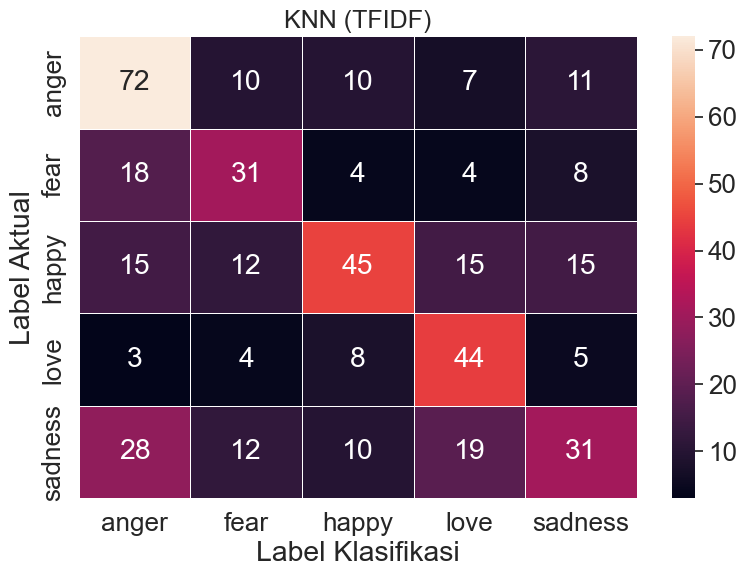

In [53]:
# menampilkan confusion matrix
temp = Y_test_tfidf.value_counts()
df1 = pd.DataFrame({'label': sorted(temp.index),
                   'values': temp.values
                  })
f, ax = plt.subplots(figsize=(9,6))
sns.set(font_scale=1.7) # Adjust to fit
sns.heatmap(confusion_matrix(Y_test_tfidf, predicted1), annot=True, fmt="g", ax=ax, linewidths=.5)
plt.title('KNN (TFIDF)', fontsize=18)
plt.xlabel("Label Klasifikasi")
plt.ylabel("Label Aktual")
ax.xaxis.set_ticklabels(df1['label'])
ax.yaxis.set_ticklabels(df1['label'])
plt.show()

## 2. SVM-RBF (TF-IDF)

In [11]:
model2 = SVC(kernel='rbf', probability=True)

In [12]:
# Evaluasi training tiap skenario dengan 10-Fold CV
scoring = ['accuracy','precision_macro','recall_macro','f1_macro']
score2 = cross_validate(model2, X_train_tfidf, Y_train_tfidf, cv=10, scoring=scoring)
print("Accuracy training adalah %0.4f"% score2['test_accuracy'].mean())
print("Precision training adalah %0.4f"% score2['test_precision_macro'].mean())
print("Recall training adalah %0.4f"% score2['test_recall_macro'].mean())
print("F1-score training adalah %0.4f"% score2['test_f1_macro'].mean())

Accuracy training adalah 0.6253
Precision training adalah 0.6912
Recall training adalah 0.6101
F1-score training adalah 0.6285


In [ ]:
# Evaluasi testing tiap skenario dengan representasi confusion matrix
clf2 = model2.fit(X_train_tfidf, Y_train_tfidf)
predicted2 = clf2.predict(X_test_tfidf) # prediksi oleh model
print("Accuracy testing adalah %0.4f" % accuracy_score(Y_test_tfidf, predicted2))
print("Precision testing adalah %0.4f" % precision_score(Y_test_tfidf, predicted2, average='macro'))
print("Recall testing adalah %0.4f" % recall_score(Y_test_tfidf, predicted2, average='macro'))
print("F1-score testing adalah %0.4f" % f1_score(Y_test_tfidf, predicted2, average='macro'))
print(confusion_matrix(Y_test_tfidf, predicted2))

Accuracy testing adalah 0.6100
Precision testing adalah 0.6729
Recall testing adalah 0.5948
F1-score testing adalah 0.6114
[[87  0 12  1 10]
 [18 29  6  1 11]
 [14  1 64  6 17]
 [ 2  0 13 39 10]
 [27  1 18  4 50]]


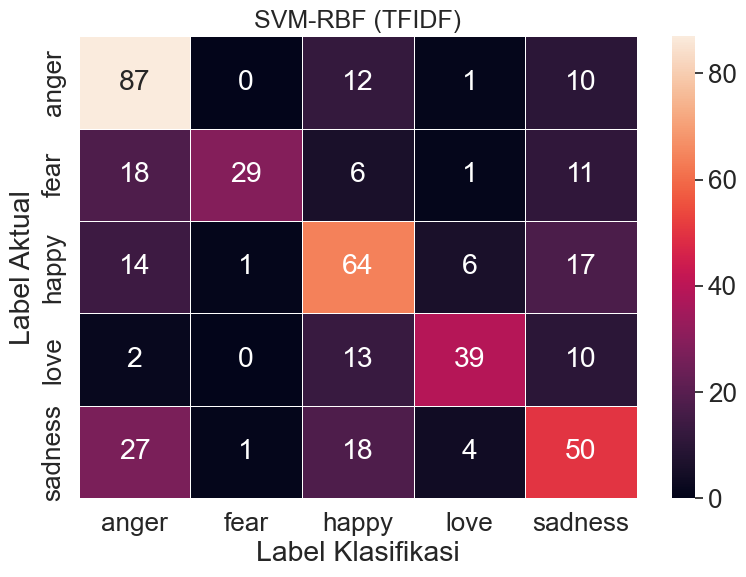

In [58]:
# menampilkan confusion matrix
temp = Y_test_tfidf.value_counts()
df1 = pd.DataFrame({'label': sorted(temp.index),
                   'values': temp.values
                  })
f, ax = plt.subplots(figsize=(9,6))
sns.set(font_scale=1.7) # Adjust to fit
sns.heatmap(confusion_matrix(Y_test_tfidf, predicted2), annot=True, fmt="g", ax=ax, linewidths=.5)
plt.title('SVM-RBF (TFIDF)', fontsize=18)
plt.xlabel("Label Klasifikasi")
plt.ylabel("Label Aktual")
ax.xaxis.set_ticklabels(df1['label'])
ax.yaxis.set_ticklabels(df1['label'])
plt.show()

## 3. KNN (BIGRAM)

In [14]:
model3 = KNeighborsClassifier()

In [15]:
# Evaluasi training tiap skenario dengan 10-Fold CV
scoring = ['accuracy','precision_macro','recall_macro','f1_macro']
score3 = cross_validate(model3, X_train_bigram, Y_train_bigram, cv=10, scoring=scoring)
print("Accuracy training adalah %0.4f"% score3['test_accuracy'].mean())
print("Precision training adalah %0.4f"% score3['test_precision_macro'].mean())
print("Recall training adalah %0.4f"% score3['test_recall_macro'].mean())
print("F1-score training adalah %0.4f"% score3['test_f1_macro'].mean())

C:\Users\chavi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chavi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chavi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\U

Accuracy training adalah 0.2485
Precision training adalah 0.3875
Recall training adalah 0.2236
F1-score training adalah 0.1559


In [ ]:
# Evaluasi testing tiap skenario dengan representasi confusion matrix
clf3 = model3.fit(X_train_bigram, Y_train_bigram)
predicted3 = clf3.predict(X_test_bigram) # prediksi oleh model
print("Accuracy testing adalah %0.4f" % accuracy_score(Y_test_bigram, predicted3))
print("Precision testing adalah %0.4f" % precision_score(Y_test_bigram, predicted3, average='macro'))
print("Recall testing adalah %0.4f" % recall_score(Y_test_bigram, predicted3, average='macro'))
print("F1-score testing adalah %0.4f" % f1_score(Y_test_bigram, predicted3, average='macro'))
print(confusion_matrix(Y_test_bigram, predicted3))

Accuracy testing adalah 0.2585
Precision testing adalah 0.5502
Recall testing adalah 0.2303
F1-score testing adalah 0.1690
[[ 4  0 33  0 73]
 [ 2  1 18  0 44]
 [ 0  0 36  1 65]
 [ 0  0 24  3 37]
 [ 2  0 28  0 70]]


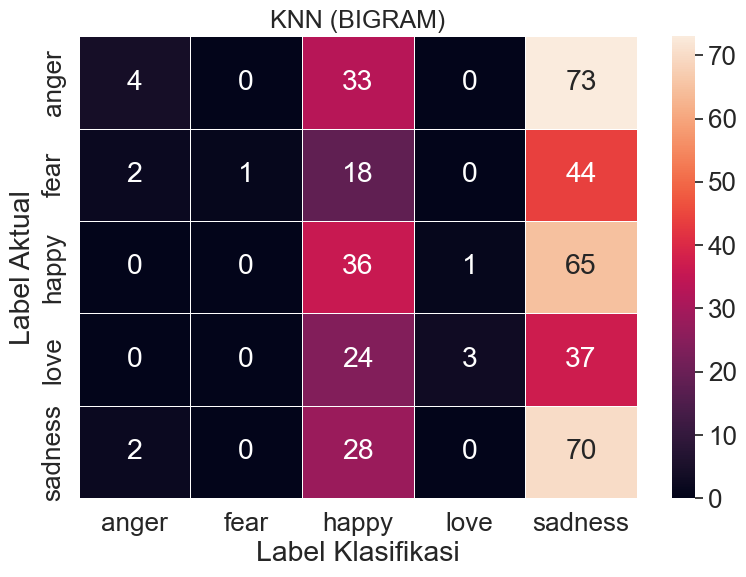

In [62]:
# menampilkan confusion matrix
temp = Y_test_bigram.value_counts()
df1 = pd.DataFrame({'label': sorted(temp.index),
                   'values': temp.values
                  })
f, ax = plt.subplots(figsize=(9,6))
sns.set(font_scale=1.7) # Adjust to fit
sns.heatmap(confusion_matrix(Y_test_bigram, predicted3), annot=True, fmt="g", ax=ax, linewidths=.5)
plt.title('KNN (BIGRAM)', fontsize=18)
plt.xlabel("Label Klasifikasi")
plt.ylabel("Label Aktual")
ax.xaxis.set_ticklabels(df1['label'])
ax.yaxis.set_ticklabels(df1['label'])
plt.show()

## 4. SVM-RBF (BIGRAM)

In [17]:
model4 = SVC(kernel='rbf', probability=True)

In [18]:
# Evaluasi training tiap skenario dengan 10-Fold CV
scoring = ['accuracy','precision_macro','recall_macro','f1_macro']
score4 = cross_validate(model4, X_train_bigram, Y_train_bigram, cv=10, scoring=scoring)
print("Accuracy training adalah %0.4f"% score4['test_accuracy'].mean())
print("Precision training adalah %0.4f"% score4['test_precision_macro'].mean())
print("Recall training adalah %0.4f"% score4['test_recall_macro'].mean())
print("F1-score training adalah %0.4f"% score4['test_f1_macro'].mean())

Accuracy training adalah 0.3462
Precision training adalah 0.5784
Recall training adalah 0.3090
F1-score training adalah 0.2803


In [19]:
# Evaluasi testing tiap skenario dengan representasi confusion matrix
clf4 = model4.fit(X_train_bigram, Y_train_bigram)
predicted4 = clf4.predict(X_test_bigram) # prediksi oleh model
print("Accuracy testing adalah %0.4f" % accuracy_score(Y_test_bigram, predicted4))
print("Precision testing adalah %0.4f" % precision_score(Y_test_bigram, predicted4, average='macro'))
print("Recall testing adalah %0.4f" % recall_score(Y_test_bigram, predicted4, average='macro'))
print("F1-score testing adalah %0.4f" % f1_score(Y_test_bigram, predicted4, average='macro'))
print(confusion_matrix(Y_test_bigram, predicted4))

Accuracy testing adalah 0.3651
Precision testing adalah 0.5725
Recall testing adalah 0.3254
F1-score testing adalah 0.2938
[[79  0 28  0  3]
 [30  6 28  0  1]
 [42  0 57  3  0]
 [22  0 28 12  2]
 [55  1 37  0  7]]


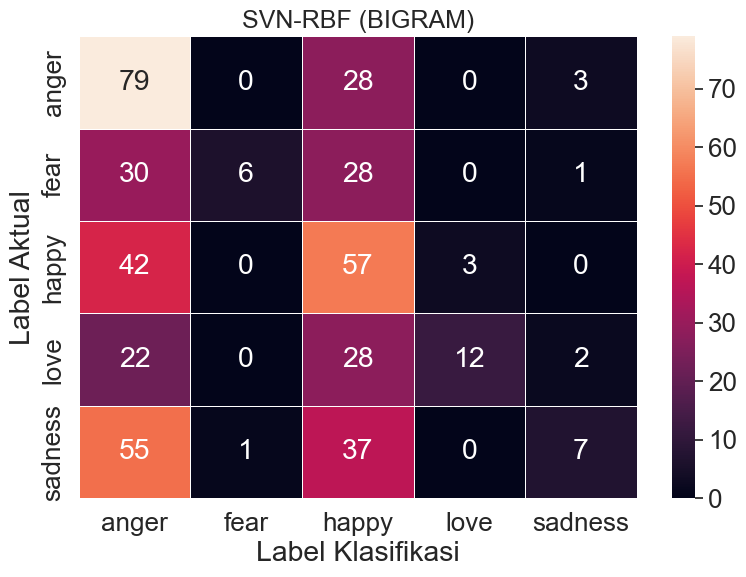

In [63]:
# menampilkan confusion matrix
temp = Y_test_bigram.value_counts()
df1 = pd.DataFrame({'label': sorted(temp.index),
                   'values': temp.values
                  })
f, ax = plt.subplots(figsize=(9,6))
sns.set(font_scale=1.7) # Adjust to fit
sns.heatmap(confusion_matrix(Y_test_bigram, predicted4), annot=True, fmt="g", ax=ax, linewidths=.5)
plt.title('SVN-RBF (BIGRAM)', fontsize=18)
plt.xlabel("Label Klasifikasi")
plt.ylabel("Label Aktual")
ax.xaxis.set_ticklabels(df1['label'])
ax.yaxis.set_ticklabels(df1['label'])
plt.show()

# DUMP VEKTORISASI DAN MODEL

## 1. SIMPAN HASIL VEKTORISASI KE BENTUK DISK (.PKL)

In [20]:
# simpan vektorisasi tfidf
#disk_tfidf = 'tf-idf.pkl'
#joblib.dump(tfidf, open(disk_tfidf, 'wb'))
# simpan vektorisasi bigram
#disk_bigram = 'bigram.pkl'
#joblib.dump(bigram, open(disk_bigram, 'wb'))

## 2. SIMPAN MODEL YANG SUDAH DILATIH KE BENTUK DISK (.PKL)

In [21]:
# simpan model KNN (TFIDF)
disk_model1 = 'knn-tfidf.pkl'
joblib.dump(model1, open(disk_model1, 'wb'))
# simpan model SVM-RBF (TFIDF)
disk_model2 = 'svm-tfidf.pkl'
joblib.dump(model2, open(disk_model2, 'wb'))
# simpan model KNN (BIGRAM)
disk_model3 = 'knn-bigram.pkl'
joblib.dump(model3, open(disk_model3, 'wb'))
# simpan model SVM-RBF (BIGRAM)
disk_model4 = 'svm-bigram.pkl'
joblib.dump(model4, open(disk_model4, 'wb'))